# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [23]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [24]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [25]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [26]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [27]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [28]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_subject_categories',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')

In [29]:
# join two dataframes in python: 
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [30]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_subject_categories',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity'],
      dtype='object')

In [31]:
print(project_data.shape)
project_data = project_data.dropna(subset=['teacher_prefix'])
print(project_data.shape)

(109248, 19)
(109245, 19)


## 1.2 preprocessing of `project_subject_categories`

In [32]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [33]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [34]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [35]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [36]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [37]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [38]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

Some of my students come from difficult family lives, but they do not let that stop them. We have built a community in our classroom that allows each student to be comfortable with who they are. Even though we are a diverse school, everyone feels included. We have a high Hispanic population, and about 90% of the students are on free or reduced-price lunch. Most students are living with a single parent or both parents work full time, although many parents are eager to help in any way they can.\r\nWe all know how important it is to get kids up and moving. I want my classroom to be a place where students can be active phyically and mentally. The requested items will allow my students to move all day. When they are sitting in a chair, their movement is limited.\r\n       Kindergarten students have a hard time sitting still for long periods of time. They would much rather bounce on a stability ball or wiggle on a cushion than sit in a hard chair. Having these choices in my classroom will al

In [39]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [40]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109245/109245 [00:44<00:00, 2441.81it/s]


In [41]:
# after preprocesing
preprocessed_essays[20000]

'students come difficult family lives not let stop built community classroom allows student comfortable even though diverse school everyone feels included high hispanic population 90 students free reduced price lunch students living single parent parents work full time although many parents eager help way know important get kids moving want classroom place students active phyically mentally requested items allow students move day sitting chair movement limited kindergarten students hard time sitting still long periods time would much rather bounce stability ball wiggle cushion sit hard chair choices classroom allow students active learn time choices classroom also build greater bond students learn choose seat best fits learning style hopefully able help classmates find seat works students move around room able work everyone instead one group day nannan'

In [42]:
project_data["essay"]=preprocessed_essays
project_data.essay.values[20000]

'students come difficult family lives not let stop built community classroom allows student comfortable even though diverse school everyone feels included high hispanic population 90 students free reduced price lunch students living single parent parents work full time although many parents eager help way know important get kids moving want classroom place students active phyically mentally requested items allow students move day sitting chair movement limited kindergarten students hard time sitting still long periods time would much rather bounce stability ball wiggle cushion sit hard chair choices classroom allow students active learn time choices classroom also build greater bond students learn choose seat best fits learning style hopefully able help classmates find seat works students move around room able work everyone instead one group day nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [43]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109245/109245 [00:02<00:00, 54330.08it/s]


In [44]:
print(project_data['project_title'].values[20000])
project_data['project_title']=preprocessed_project_title
print(project_data['project_title'].values[20000])

Wiggle While We Learn
wiggle learn


# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [45]:
sampling=True
undersampling=False
if (not sampling):
    print("Total data ",project_data.shape)
    
else:
    if(sampling and undersampling):
        print("Total data ",project_data.shape)
        project_data_negative=project_data[project_data.project_is_approved==0]
        project_data_positive=project_data[project_data.project_is_approved==1]
        project_data_positive=project_data_positive.sample(n=project_data_negative.shape[0],random_state=42)
        print("Positive points: ",project_data_positive.shape[0])
        print("Negaitive points: ",project_data_negative.shape[0])
        project_data=pd.concat([project_data_positive,project_data_negative])
    else:
        print("Total data ",project_data.shape)
        project_data_negative=project_data[project_data.project_is_approved==0]
        project_data_positive=project_data[project_data.project_is_approved==1]
        project_data_negative=project_data_negative.sample(n=project_data_positive.shape[0],replace=True,random_state=42)
        print("Positive points: ",project_data_positive.shape[0])
        print("Negaitive points: ",project_data_negative.shape[0])
        project_data=pd.concat([project_data_positive,project_data_negative])

data_point_size=50000
project_data=project_data.sample(n=data_point_size,random_state=42,replace=True)
print("positive and negative counts")
print(project_data.project_is_approved.value_counts())
project_data_Y=project_data.project_is_approved
project_data_X=project_data.drop(columns=['project_is_approved'])
print("After sampling: ",project_data_X.shape)

Total data  (109245, 20)
Positive points:  92703
Negaitive points:  92703
positive and negative counts
1    25022
0    24978
Name: project_is_approved, dtype: int64
After sampling:  (50000, 19)


In [46]:
from sklearn.model_selection import train_test_split
project_data_X_train,project_data_X_test,project_data_Y_train,project_data_Y_test=train_test_split(project_data_X,project_data_Y,test_size=0.2, random_state=42)

In [47]:
print(project_data_X_train.shape)
print(project_data_X_test.shape)
print(project_data_Y_train.shape)
print(project_data_Y_test.shape)

(40000, 19)
(10000, 19)
(40000,)
(10000,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

<h2>2.2.1 Categorical features </h2>

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data_X_train['clean_categories'].values)
print(vectorizer.get_feature_names())

#for train data
categories_one_hot_train = vectorizer.transform(project_data_X_train['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)


#for test
categories_one_hot_test = vectorizer.transform(project_data_X_test['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (40000, 9)
Shape of matrix after one hot encodig  (10000, 9)


In [49]:
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data_X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())

#for train data
sub_categories_one_hot_train = vectorizer.transform(project_data_X_train['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_train.shape)

#for test
sub_categories_one_hot_test = vectorizer.transform(project_data_X_test['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_test.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (40000, 30)
Shape of matrix after one hot encodig  (10000, 30)


In [50]:
project_data_X_train.teacher_prefix = project_data_X_train.teacher_prefix.replace(np.nan, '', regex=True)
print(project_data_X_train.teacher_prefix.value_counts())
project_data_X_test.teacher_prefix = project_data_X_test.teacher_prefix.replace(np.nan, '', regex=True)
print(project_data_X_test.teacher_prefix.value_counts())

Mrs.       20638
Ms.        14449
Mr.         3920
Teacher      984
Dr.            9
Name: teacher_prefix, dtype: int64
Mrs.       5097
Ms.        3657
Mr.        1002
Teacher     242
Dr.           2
Name: teacher_prefix, dtype: int64


In [51]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(project_data_X_train['teacher_prefix'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data_X_train['teacher_prefix'].values)
print(vectorizer.get_feature_names())

teacher_prefix_one_hot_train = vectorizer.transform(project_data_X_train['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)

teacher_prefix_one_hot_test = vectorizer.transform(project_data_X_test['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)

['Ms.', 'Mrs.', 'Mr.', 'Teacher', 'Dr.']
Shape of matrix after one hot encodig  (40000, 5)
Shape of matrix after one hot encodig  (10000, 5)


In [52]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(project_data_X_train['project_grade_category'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data_X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())

project_grade_category_one_hot_train = vectorizer.transform(project_data_X_train['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_train.shape)

project_grade_category_one_hot_test = vectorizer.transform(project_data_X_test['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_test.shape)

['Grades 3-5', 'Grades 9-12', 'Grades 6-8', 'Grades PreK-2']
Shape of matrix after one hot encodig  (40000, 4)
Shape of matrix after one hot encodig  (10000, 4)


In [53]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(project_data_X_train['school_state'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data_X_train['school_state'].values)
print(vectorizer.get_feature_names())


school_state_one_hot_train = vectorizer.transform(project_data_X_train['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_train.shape)

school_state_one_hot_test = vectorizer.transform(project_data_X_test['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_test.shape)

['TN', 'PA', 'GA', 'TX', 'FL', 'NC', 'IL', 'NY', 'MO', 'VA', 'WA', 'LA', 'DC', 'KY', 'CA', 'WI', 'IN', 'KS', 'CO', 'SC', 'NV', 'MN', 'NJ', 'CT', 'MS', 'MD', 'MA', 'DE', 'UT', 'OK', 'NH', 'OH', 'AL', 'AZ', 'MI', 'NM', 'RI', 'HI', 'WV', 'ME', 'AR', 'VT', 'OR', 'MT', 'ND', 'ID', 'NE', 'SD', 'IA', 'AK', 'WY']
Shape of matrix after one hot encodig  (40000, 51)
Shape of matrix after one hot encodig  (10000, 51)


<h2>2.2.2 Numerical features </h2>

In [54]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

#price_scalar = StandardScaler()
#price_scalar.fit(project_data_X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
#price_standardized_train =project_data_X_train['price']# price_scalar.transform(project_data_X_train['price'].values.reshape(-1, 1))
# Now standardize the data with above maen and variance.
#price_standardized_test = project_data_X_test['price']#price_scalar.transform(project_data_X_test['price'].values.reshape(-1, 1))


In [55]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import MinMaxScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = MinMaxScaler()
price_scalar.fit(project_data_X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(price_scalar.data_max_)
print(price_scalar.data_min_)
# Now standardize the data with above maen and variance.
price_standardized_train =price_scalar.transform(project_data_X_train['price'].values.reshape(-1, 1))
# Now standardize the data with above maen and variance.
price_standardized_test =price_scalar.transform(project_data_X_test['price'].values.reshape(-1, 1))


[9999.]
[0.69]


In [56]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,normalize

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

#price_scalar = StandardScaler()
#price_scalar.fit(project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
#teacher_number_of_previously_posted_projects_standardized_train = normalize(project_data_X_train['teacher_number_of_previously_posted_projects'])# price_scalar.transform(project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

# Now standardize the data with above maen and variance.
#teacher_number_of_previously_posted_projects_standardized_test = normalize(project_data_X_test['teacher_number_of_previously_posted_projects'])# price_scalar.transform(project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

In [57]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import MinMaxScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = MinMaxScaler()
price_scalar.fit(project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(price_scalar.data_max_)
print(price_scalar.data_min_)
# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_train = price_scalar.transform(project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_test = price_scalar.transform(project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

[433.]
[0.]


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [58]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(project_data_X_train.essay.values)

text_bow_train=vectorizer.fit_transform(project_data_X_train.essay.values)
print(text_bow_train.shape)

text_bow_test=vectorizer.transform(project_data_X_test.essay.values)
print(text_bow_test.shape)

(40000, 11061)
(10000, 11061)


In [60]:
# Similarly you can vectorize for title also
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(project_data_X_train.project_title.values)

title_text_bow_train=vectorizer.fit_transform(project_data_X_train.project_title.values)
print(title_text_bow_train.shape)

title_text_bow_test=vectorizer.transform(project_data_X_test.project_title.values)
print(title_text_bow_test.shape)

(40000, 1768)
(10000, 1768)


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(project_data_X_train.essay.values)

text_tfidf_train=vectorizer.fit_transform(project_data_X_train.essay.values)
print(text_tfidf_train.shape)

text_tfidf_test=vectorizer.transform(project_data_X_test.essay.values)
print(text_tfidf_test.shape)

(40000, 11061)
(10000, 11061)


In [62]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(project_data_X_train.project_title.values)

title_text_tfidf_train=vectorizer.fit_transform(project_data_X_train.project_title.values)
print(title_text_tfidf_train.shape)

title_text_tfidf_test=vectorizer.transform(project_data_X_test.project_title.values)
print(title_text_tfidf_test.shape)

(40000, 1768)
(10000, 1768)


In [63]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
# borrowed from https://therenegadecoder.com/code/how-to-check-if-a-file-exists-in-python/
import os
exists = os.path.isfile('./glove_vectors')
if(not exists):
    model = loadGloveModel('glove.42B.300d.txt')

    '''# ============================
    Output:

    Loading Glove Model
    1917495it [06:32, 4879.69it/s]
    Done. 1917495  words loaded!

    # ============================'''

    words = []
    for i in preproced_texts:
        words.extend(i.split(' '))

    for i in preproced_titles:
        words.extend(i.split(' '))
    print("all the words in the coupus", len(words))
    words = set(words)
    print("the unique words in the coupus", len(words))

    inter_words = set(model.keys()).intersection(words)
    print("The number of words that are present in both glove vectors and our coupus", \
          len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

    words_courpus = {}
    words_glove = set(model.keys())
    for i in words:
        if i in words_glove:
            words_courpus[i] = model[i]
    print("word 2 vec length", len(words_courpus))


    # stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

    import pickle
    with open('glove_vectors', 'wb') as f:
        pickle.dump(words_courpus, f)
else:
    print("glove already exists. No need to compute")

glove already exists. No need to compute


In [64]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [65]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_train.essay.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_train.append(vector)

print(len(avg_w2v_vectors_essay_train))
print(len(avg_w2v_vectors_essay_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 40000/40000 [00:08<00:00, 4978.50it/s]


40000
300


In [66]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_test.essay.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_test.append(vector)

print(len(avg_w2v_vectors_essay_test))
print(len(avg_w2v_vectors_essay_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4857.94it/s]


10000
300


In [67]:
# average Word2Vec
# compute average word2vec for each title.
title_avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_train.project_title.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_avg_w2v_vectors_train.append(vector)

print(len(title_avg_w2v_vectors_train))
print(len(title_avg_w2v_vectors_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 40000/40000 [00:00<00:00, 92412.11it/s]


40000
300


In [68]:
# average Word2Vec
# compute average word2vec for each title.
title_avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_test.project_title.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_avg_w2v_vectors_test.append(vector)

print(len(title_avg_w2v_vectors_test))
print(len(title_avg_w2v_vectors_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 89525.09it/s]


10000
300


In [69]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_X_train.essay.values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
essay_tfidf_words = set(tfidf_model.get_feature_names())

In [70]:
# average Word2Vec
# compute average word2vec for each review.
essay_tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_train.essay.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in essay_tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_vectors_train.append(vector)

print(len(essay_tfidf_w2v_vectors_train))
print(len(essay_tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [00:56<00:00, 709.83it/s]


40000
300


In [71]:
# average Word2Vec
# compute average word2vec for each review.
essay_tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_test.essay.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in essay_tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_vectors_test.append(vector)

print(len(essay_tfidf_w2v_vectors_test))
print(len(essay_tfidf_w2v_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:14<00:00, 708.70it/s]


10000
300


In [72]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_X_train.project_title.values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
essay_tfidf_words = set(tfidf_model.get_feature_names())

In [73]:
# average Word2Vec
# compute average word2vec for each review.
title_tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_train.project_title.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in essay_tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_tfidf_w2v_vectors_train.append(vector)

print(len(title_tfidf_w2v_vectors_train))
print(len(title_tfidf_w2v_vectors_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 40000/40000 [00:00<00:00, 46312.91it/s]


40000
300


In [74]:
# average Word2Vec
# compute average word2vec for each review.
title_tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_test.project_title.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in essay_tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_tfidf_w2v_vectors_test.append(vector)

print(len(title_tfidf_w2v_vectors_test))
print(len(title_tfidf_w2v_vectors_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 43977.25it/s]


10000
300


<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [76]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
BOW = hstack((categories_one_hot_train, sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,project_data_X_train['price'].values.reshape(-1,1),project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),text_bow_train,title_text_bow_train))
print(BOW.shape)
BOW_test= hstack((categories_one_hot_test, sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,project_data_X_test['price'].values.reshape(-1,1),project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),text_bow_test,title_text_bow_test))
print(BOW_test.shape)

(40000, 12926)
(10000, 12926)


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier(algorithm='brute')
a=np.arange(1,150,4)
print(a)
parameters = {'n_neighbors': a }
clf = GridSearchCV(model, parameters, scoring='roc_auc',n_jobs=4,verbose=20)
clf.fit(BOW,project_data_Y_train)

[  1   5   9  13  17  21  25  29  33  37  41  45  49  53  57  61  65  69
  73  77  81  85  89  93  97 101 105 109 113 117 121 125 129 133 137 141
 145 149]
Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:  8.8min
[Parallel(

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_neighbors': array([  1,   5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 101,
       105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=20)

In [78]:
clf.best_score_
k=a
auc_cv=clf.cv_results_['mean_test_score']
auc_train=clf.cv_results_['mean_train_score']
x=np.argsort(auc_cv)
optimal_value=k[x[-1]]
print("optimal value is: ",optimal_value)

optimal value is:  1


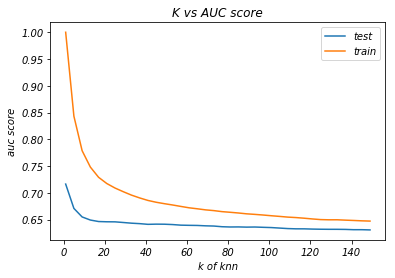

In [79]:
k=a
auc_cv=clf.cv_results_['mean_test_score']
auc_train=clf.cv_results_['mean_train_score']
plt.plot(k,auc_cv)
plt.plot(k,auc_train)
plt.title('K vs AUC score')
plt.xlabel('k of knn')
plt.ylabel('auc score')
plt.legend({"test":"","train":""})

In [80]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=21,algorithm='brute',n_jobs=4)
model.fit(BOW,project_data_Y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=21, p=2,
           weights='uniform')

AUC: 0.667
AUC: 0.729


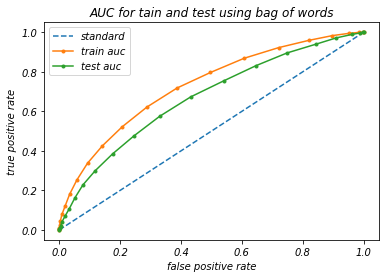

In [82]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

probs_test = model.predict_proba(BOW_test.todense())
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(project_data_Y_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr, tpr, thresholds = roc_curve(project_data_Y_test, probs_test)

probs_train = model.predict_proba(BOW)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(project_data_Y_train, probs_train)
print('AUC: %.3f' % auc_train)
fpr1, tpr1, thresholds1 = roc_curve(project_data_Y_train, probs_train)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.plot(fpr, tpr, marker='.')

plt.legend({"standard":"","train auc":"","test auc":""})
plt.title("AUC for tain and test using bag of words")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

3772 1227 2621 2380
true positive rate 0.47590481903619275
true negaitive rate 0.7545509101820365
[[3772, 2621], [1227, 2380]]


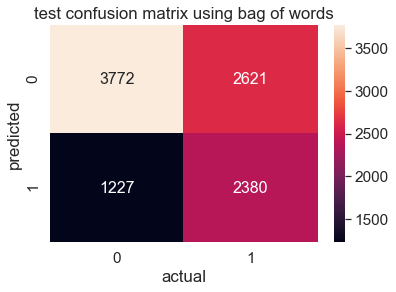

In [83]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(BOW_test)
tn, fp, fn, tp = confusion_matrix(project_data_Y_test,predicted_bow_test).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

15845 4134 9569 10452
true positive rate 0.5220518455621598
true negaitive rate 0.7930827368737174
[[15845, 9569], [4134, 10452]]


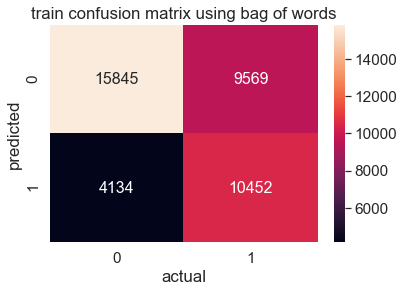

In [84]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(BOW)
tn, fp, fn, tp = confusion_matrix(project_data_Y_train,predicted_bow_test).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("train confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [85]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
TFIDF = hstack((categories_one_hot_train, sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,project_data_X_train['price'].values.reshape(-1,1),project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),text_tfidf_train,title_text_tfidf_train))
print(TFIDF.shape)
TFIDF_test = hstack((categories_one_hot_test, sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,project_data_X_test['price'].values.reshape(-1,1),project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),text_tfidf_test,title_text_tfidf_test))
print(TFIDF_test.shape)

(40000, 12926)
(10000, 12926)


In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier(algorithm='brute')
a=np.arange(1,132,6)
print(a)
parameters = {'n_neighbors': a }
clf = GridSearchCV(model, parameters, scoring='roc_auc',n_jobs=4,verbose=10)
clf.fit(TFIDF,project_data_Y_train)

[  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127]
Fitting 3 folds for each of 22 candidates, totalling 66 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 11.9min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 14.2min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 20.7min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 25.2min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 31.9min
[Parallel(n_jobs=4)]: Done  66 out of  66 | elapsed: 38.0min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  66 out of  66 | elapsed: 38.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_neighbors': array([  1,   7,  13,  19,  25,  31,  37,  43,  49,  55,  61,  67,  73,
        79,  85,  91,  97, 103, 109, 115, 121, 127])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [87]:
clf.best_score_
k=a
auc_cv=clf.cv_results_['mean_test_score']
auc_train=clf.cv_results_['mean_train_score']
x=np.argsort(auc_cv)
optimal_value=k[x[-1]]
print("optimal value is: ",optimal_value)

optimal value is:  1


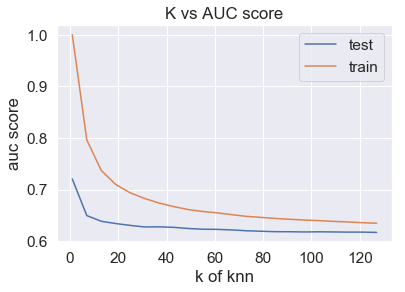

In [88]:
plt.plot(k,auc_cv)
plt.plot(k,auc_train)
plt.title('K vs AUC score')
plt.xlabel('k of knn')
plt.ylabel('auc score')
plt.legend({"test":"","train":""})

In [89]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=21,algorithm='brute',n_jobs=4)
model.fit(TFIDF,project_data_Y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=21, p=2,
           weights='uniform')

AUC: 0.654
AUC: 0.716


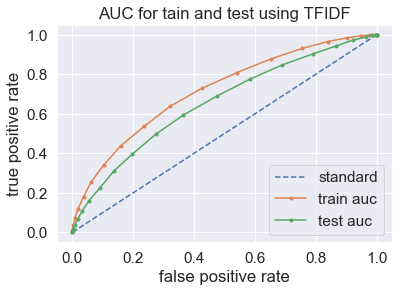

In [90]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs_test = model.predict_proba(TFIDF_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(project_data_Y_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr, tpr, thresholds = roc_curve(project_data_Y_test, probs_test)

probs_train = model.predict_proba(TFIDF)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(project_data_Y_train, probs_train)
print('AUC: %.3f' % auc_train)
fpr1, tpr1, thresholds1 = roc_curve(project_data_Y_train, probs_train)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.plot(fpr, tpr, marker='.')

plt.legend({"standard":"","train auc":"","test auc":""})
plt.title("AUC for tain and test using TFIDF")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

3177 1822 2034 2967
true positive rate 0.5932813437312537
true negaitive rate 0.6355271054210843
[[3177, 2034], [1822, 2967]]


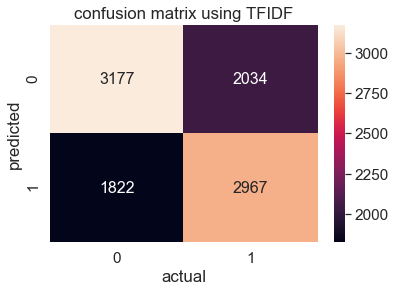

In [91]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(TFIDF_test)
tn, fp, fn, tp = confusion_matrix(project_data_Y_test,predicted_bow_test).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))

matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size
plt.title("confusion matrix using TFIDF")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

13556 6423 7250 12771
true positive rate 0.6378802257629489
true negaitive rate 0.678512438059963
[[13556, 7250], [6423, 12771]]


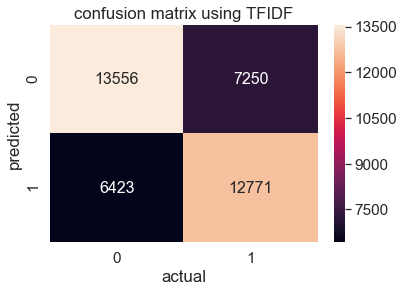

In [92]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(TFIDF)
tn, fp, fn, tp = confusion_matrix(project_data_Y_train,predicted_bow_test).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))

matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size
plt.title("confusion matrix using TFIDF")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [93]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
AVG_W2V = hstack((categories_one_hot_train, sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,project_data_X_train['price'].values.reshape(-1,1),project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),avg_w2v_vectors_essay_train,title_avg_w2v_vectors_train))
print(AVG_W2V.shape)
AVG_W2V_test = hstack((categories_one_hot_test, sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,project_data_X_test['price'].values.reshape(-1,1),project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),avg_w2v_vectors_essay_test,title_avg_w2v_vectors_test))
print(AVG_W2V_test.shape)

(40000, 697)
(10000, 697)


In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier(algorithm='brute')
a=np.arange(10,200,6)
print(a)
parameters = {'n_neighbors': a }
clf = GridSearchCV(model, parameters, scoring='roc_auc',n_jobs=4,verbose=30)
clf.fit(AVG_W2V.todense()[:2500,:],project_data_Y_train.values[:2500])

[ 10  16  22  28  34  40  46  52  58  64  70  76  82  88  94 100 106 112
 118 124 130 136 142 148 154 160 166 172 178 184 190 196]
Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    2.1s
[Parallel(

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_neighbors': array([ 10,  16,  22,  28,  34,  40,  46,  52,  58,  64,  70,  76,  82,
        88,  94, 100, 106, 112, 118, 124, 130, 136, 142, 148, 154, 160,
       166, 172, 178, 184, 190, 196])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=30)

In [95]:
clf.best_score_
k=a
auc_cv=clf.cv_results_['mean_test_score']
auc_train=clf.cv_results_['mean_train_score']
x=np.argsort(auc_cv)
optimal_value=k[x[-1]]
print("optimal value is: ",optimal_value)

optimal value is:  46


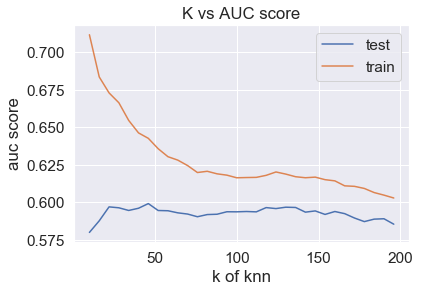

In [96]:
plt.plot(k,auc_cv)
plt.plot(k,auc_train)
plt.title('K vs AUC score')
plt.xlabel('k of knn')
plt.ylabel('auc score')
plt.legend({"test":"","train":""})

In [97]:
from sklearn.neighbors import KNeighborsClassifier
print()
model=KNeighborsClassifier(n_neighbors=49,algorithm='brute',n_jobs=4)
model.fit(AVG_W2V,project_data_Y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=49, p=2,
           weights='uniform')

AUC: 0.645
AUC: 0.673


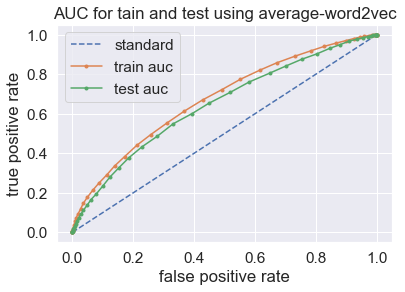

In [98]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs_test = model.predict_proba(AVG_W2V_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(project_data_Y_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr, tpr, thresholds = roc_curve(project_data_Y_test, probs_test)

probs_train = model.predict_proba(AVG_W2V)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(project_data_Y_train, probs_train)
print('AUC: %.3f' % auc_train)
fpr1, tpr1, thresholds1 = roc_curve(project_data_Y_train, probs_train)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.plot(fpr, tpr, marker='.')

plt.legend({"standard":"","train auc":"","test auc":""})
plt.title("AUC for tain and test using average-word2vec")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

3032 1967 1996 3005
true positive rate 0.6008798240351929
true negaitive rate 0.6065213042608522
[[3032, 1996], [1967, 3005]]


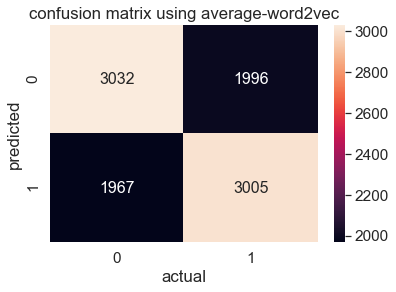

In [99]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(AVG_W2V_test)
tn, fp, fn, tp = confusion_matrix(project_data_Y_test,predicted_bow_test).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))

matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size
plt.title("confusion matrix using average-word2vec")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

12633 7346 7747 12274
true positive rate 0.6130562908945607
true negaitive rate 0.6323139296261074
[[12633, 7747], [7346, 12274]]


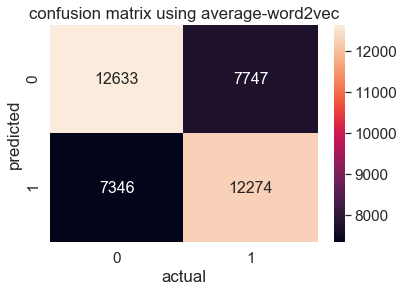

In [100]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(AVG_W2V)
tn, fp, fn, tp = confusion_matrix(project_data_Y_train,predicted_bow_test).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))

matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size
plt.title("confusion matrix using average-word2vec")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [101]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
TFIDF_W2V = hstack((categories_one_hot_train, sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,project_data_X_train['price'].values.reshape(-1,1),project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),essay_tfidf_w2v_vectors_train,title_tfidf_w2v_vectors_train))
print(TFIDF_W2V.shape)
TFIDF_W2V_test = hstack((categories_one_hot_test, sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,project_data_X_test['price'].values.reshape(-1,1),project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),essay_tfidf_w2v_vectors_test,title_tfidf_w2v_vectors_test))
print(TFIDF_W2V_test.shape)

(40000, 697)
(10000, 697)


In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier(algorithm='brute')
a=np.arange(1,200,6)
print(a)
parameters = {'n_neighbors': a }
clf = GridSearchCV(model, parameters, scoring='roc_auc',n_jobs=4,verbose=10)
clf.fit(TFIDF_W2V.todense()[:2500,:],project_data_Y_train.values[:2500])

[  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139 145 151 157 163 169 175 181 187 193 199]
Fitting 3 folds for each of 34 candidates, totalling 102 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    9.8s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done 102 out of 102 | elapsed:   12.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_neighbors': array([  1,   7,  13,  19,  25,  31,  37,  43,  49,  55,  61,  67,  73,
        79,  85,  91,  97, 103, 109, 115, 121, 127, 133, 139, 145, 151,
       157, 163, 169, 175, 181, 187, 193, 199])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [103]:
clf.best_score_
k=a
auc_cv=clf.cv_results_['mean_test_score']
auc_train=clf.cv_results_['mean_train_score']
x=np.argsort(auc_cv)
optimal_value=k[x[-1]]
print("optimal value is: ",optimal_value)

optimal value is:  31


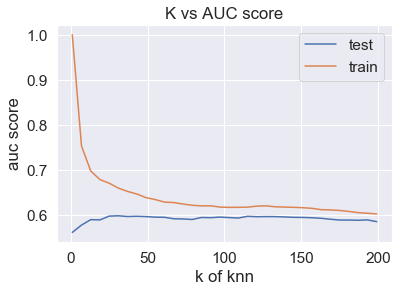

In [104]:
plt.plot(k,auc_cv)
plt.plot(k,auc_train)
plt.title('K vs AUC score')
plt.xlabel('k of knn')
plt.ylabel('auc score')
plt.legend({"test":"","train":""})

In [105]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=21,algorithm='brute',n_jobs=4)
model.fit(TFIDF_W2V,project_data_Y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=21, p=2,
           weights='uniform')

AUC: 0.660
AUC: 0.715


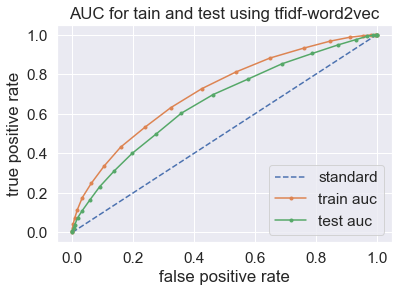

In [106]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs_test = model.predict_proba(TFIDF_W2V_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(project_data_Y_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr, tpr, thresholds = roc_curve(project_data_Y_test, probs_test)

probs_train = model.predict_proba(TFIDF_W2V)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(project_data_Y_train, probs_train)
print('AUC: %.3f' % auc_train)
fpr1, tpr1, thresholds1 = roc_curve(project_data_Y_train, probs_train)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.plot(fpr, tpr, marker='.')

plt.legend({"standard":"","train auc":"","test auc":""})
plt.title("AUC for tain and test using tfidf-word2vec")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

3209 1790 1986 3015
true positive rate 0.6028794241151769
true negaitive rate 0.6419283856771354
[[3209, 1986], [1790, 3015]]


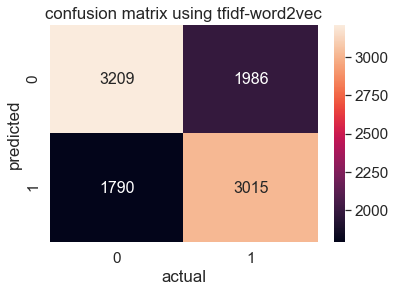

In [107]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(TFIDF_W2V_test)
tn, fp, fn, tp = confusion_matrix(project_data_Y_test,predicted_bow_test).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))

matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size
plt.title("confusion matrix using tfidf-word2vec")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

13521 6458 7394 12627
true positive rate 0.630687777833275
true negaitive rate 0.67676059862856
[[13521, 7394], [6458, 12627]]


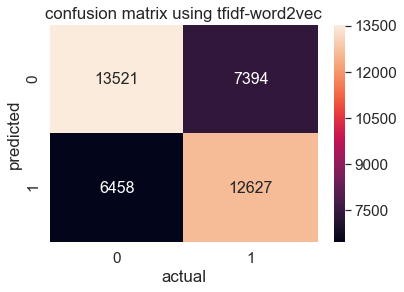

In [108]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(TFIDF_W2V)
tn, fp, fn, tp = confusion_matrix(project_data_Y_train,predicted_bow_test).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))

matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size
plt.title("confusion matrix using tfidf-word2vec")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [109]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [110]:
from sklearn.feature_selection import SelectKBest,chi2
from scipy.sparse import vstack
tfidf_total=vstack([TFIDF,TFIDF_test])
tfidf_total=SelectKBest(chi2,k=20).fit_transform(tfidf_total,project_data_Y)
print(tfidf_total.shape)
print(type(tfidf_total))

(50000, 20)
<class 'scipy.sparse.csr.csr_matrix'>


In [111]:
X_best_train,X_best_test,y_best_train,y_best_test=train_test_split(tfidf_total,project_data_Y)
print(X_best_train.shape)
print(X_best_test.shape)
print(y_best_train.shape)
print(y_best_test.shape)

(37500, 20)
(12500, 20)
(37500,)
(12500,)


In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier(algorithm='brute')
a=np.arange(1,200,6)
print(a)
parameters = {'n_neighbors': a }
clf = GridSearchCV(model, parameters, scoring='roc_auc',n_jobs=4,verbose=10)
clf.fit(X_best_train,y_best_train)

[  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139 145 151 157 163 169 175 181 187 193 199]
Fitting 3 folds for each of 34 candidates, totalling 102 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  9.4min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 11.6min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 13.8min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 16.5min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 19.9min
[Parallel(n_jobs=4)]: Done 102 out of 102 | elapsed: 22.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_neighbors': array([  1,   7,  13,  19,  25,  31,  37,  43,  49,  55,  61,  67,  73,
        79,  85,  91,  97, 103, 109, 115, 121, 127, 133, 139, 145, 151,
       157, 163, 169, 175, 181, 187, 193, 199])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [113]:
clf.best_score_
k=a
auc_cv=clf.cv_results_['mean_test_score']
auc_train=clf.cv_results_['mean_train_score']
x=np.argsort(auc_cv)
optimal_value=k[x[-1]]
print("optimal value is: ",optimal_value)

optimal value is:  109


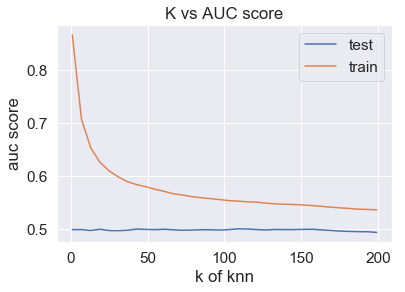

In [114]:
plt.plot(k,auc_cv)
plt.plot(k,auc_train)
plt.title('K vs AUC score')
plt.xlabel('k of knn')
plt.ylabel('auc score')
plt.legend({"test":"","train":""})

In [115]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=175,algorithm='brute',n_jobs=4)
model.fit(X_best_train,y_best_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=175, p=2,
           weights='uniform')

AUC: 0.501
AUC: 0.543


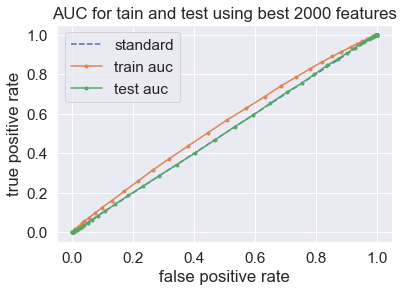

In [116]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs_test = model.predict_proba(X_best_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(y_best_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr, tpr, thresholds = roc_curve(y_best_test, probs_test)

probs_train = model.predict_proba(X_best_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(y_best_train, probs_train)
print('AUC: %.3f' % auc_train)
fpr1, tpr1, thresholds1 = roc_curve(y_best_train, probs_train)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.plot(fpr, tpr, marker='.')

plt.legend({"standard":"","train auc":"","test auc":""})
plt.title("AUC for tain and test using best 2000 features")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

### Note: This is worst than standard. Not acceptable

2935 3357 2890 3318
true positive rate 0.5344716494845361
true negaitive rate 0.4664653528289892
[[2935, 2890], [3357, 3318]]


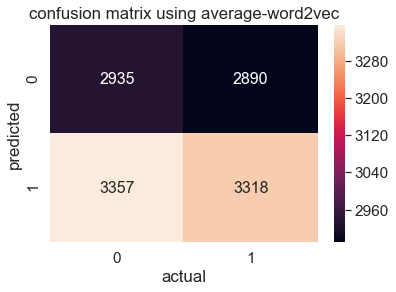

In [117]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(X_best_test)
tn, fp, fn, tp = confusion_matrix(y_best_test,predicted_bow_test).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))


matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size
plt.title("confusion matrix using average-word2vec")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

<h1>3. Conclusions</h1>

In [119]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model","Under Sampling","k", "AUC"]
x.add_row(["BAG of words", "KNN",  True, 21, 0.667])
x.add_row(["TFIDF", "KNN" , True , 21, 0.654])
x.add_row(["Average W2V", "KNN",  True,49, 0.645])
x.add_row(["TFIDF W2V", "KNN" , True, 21, 0.660])
x.add_row(["2000 best features of TFIDF", "KNN" , True, 175, 0.501])
x.border=True
print(x)

+-----------------------------+-------+----------------+-----+-------+
|          Vectorizer         | Model | Under Sampling |  k  |  AUC  |
+-----------------------------+-------+----------------+-----+-------+
|         BAG of words        |  KNN  |      True      |  21 | 0.667 |
|            TFIDF            |  KNN  |      True      |  21 | 0.654 |
|         Average W2V         |  KNN  |      True      |  49 | 0.645 |
|          TFIDF W2V          |  KNN  |      True      |  21 |  0.66 |
| 2000 best features of TFIDF |  KNN  |      True      | 175 | 0.501 |
+-----------------------------+-------+----------------+-----+-------+
